In [ ]:
!pip install WordCloud
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS


patientcomments = pd.read_csv(r'/content/drive/MyDrive/data/patientcomments.csv')


**Let's drop all missing values from the data altogether.**

In [ ]:
patientcomments.dropna(inplace=True)

**Let's drop the duplicate column of `Ratings`.**

In [ ]:
patientcomments.drop('RATING.1', axis=1, inplace=True)

In [ ]:
patientcomments.shape

(2829, 4)

**Let's look at some information about the dataset, its shape, missing values, etc.**

In [ ]:
patientcomments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 1 to 5659
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RATING         2829 non-null   object
 1   COMMENT        2829 non-null   object
 2   RECEIVED DATE  2829 non-null   object
 3   SECTION        2829 non-null   object
dtypes: object(4)
memory usage: 110.5+ KB


In [ ]:
patientcomments.isnull().sum()

RATING           0
COMMENT          0
RECEIVED DATE    0
SECTION          0
dtype: int64

In [ ]:
patientcomments.shape

(2829, 4)

**Let's convert the date column to `DateTime` datatype, extract the month from it, and store it in a column named `Month`.**

In [ ]:
patientcomments['RECEIVED DATE'] = pd.to_datetime(patientcomments['RECEIVED DATE'], infer_datetime_format=True, errors='coerce')

In [ ]:
patientcomments['month'] = patientcomments['RECEIVED DATE'].dt.month
patientcomments['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

***As you can see, now we have got a nice month column. It'll be used later in EDA!***
<hr></hr>

In [ ]:
patientcomments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 1 to 5659
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RATING         2829 non-null   object        
 1   COMMENT        2829 non-null   object        
 2   RECEIVED DATE  2829 non-null   datetime64[ns]
 3   SECTION        2829 non-null   object        
 4   month          2829 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 132.6+ KB


**Let's see the distribution of unique values in the ratings column.**

In [ ]:

fig = px.histogram(patientcomments, x='RATING', color='RATING', histfunc='count')
fig.update_layout(
    title='Distribution of unique values in ratings column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Count', 
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

**Let's see the distribution of unique values in the section column.**

In [ ]:

fig = px.histogram(patientcomments, x='SECTION', histfunc='count')
fig.update_layout(
    title='Distribution of unique values in section column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

**Let's view the rating grouped by section.**

In [ ]:
groupby_rating_section = patientcomments.groupby(['SECTION', 'RATING'])[['RATING']].count()

In [ ]:
groupby_rating_section.style.applymap(lambda x: "background-color: gray" if x>50 else "background-color: wheat")
groupby_rating_section.style.applymap(lambda x: "color: red")

**Let's display number of patient comments for every month!**

In [ ]:

fig = px.histogram(patientcomments, x='month', histfunc='count')
fig.update_layout(
    title='Nunber of patient comments for each month', 
    xaxis = dict(
        title='Month', 
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='No. of comments', 
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

**Let's display a violin plot as well.**

In [ ]:
fig = px.violin(patientcomments, x='month', points='outliers')
fig.update_layout(
    title='Violin plot for number of patients per moth', 
    xaxis = dict(
        title='Month', 
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

**Let's see the number of ratings in each section, grouped by the rating column itself!**

In [ ]:
px.histogram(data_frame = patientcomments
             ,x = 'SECTION'
             ,color = 'RATING', title = "Number of ratings in each section, grouped by ratings"
             )

**Lastly, let's also generate a Word cloud of all the text in the `comments` column!**

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in patientcomments.COMMENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

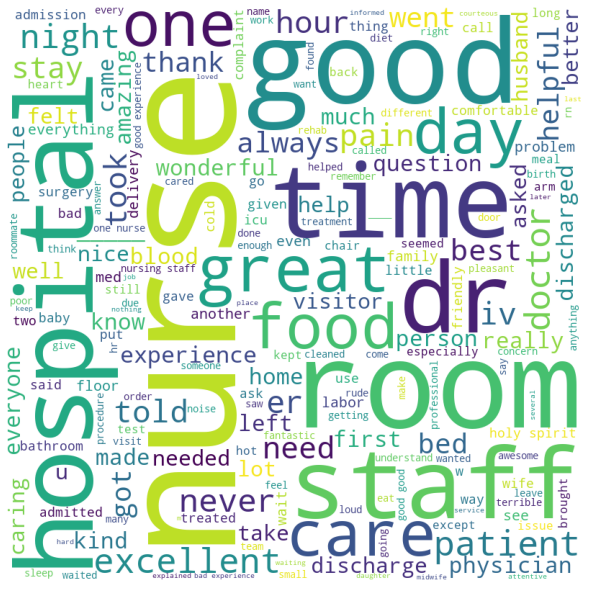

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<hr/>

<hr/>

# TOPIC MODELLING USING BERTOPIC

**Now, we'll be doing Topic modelling on the patient comments using Bertopic. We will import the dataframe, and drop only those rows where the text column is empty, because we are only dealing with the text.**

## INSTALLING AND IMPORTING BERTOPIC

In [ ]:
!pip install bertopic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 5.3 MB/s 
     |████████████████████████████████| 636 kB 43.5 MB/s 
     |████████████████████████████████| 5.2 MB 65.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.1 MB/s 
     |████████████████████████████████| 85 kB 5.8 MB/s 
     |████████████████████████████████| 5.5 MB 48.0 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 163 kB 53.2 MB/s 
     |████████████████████████████████| 7.6 MB 57.8 MB/s 
     |████████████████████████████████| 1.1 MB 69.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340722 sha256=02afeabc7750db7dbbac8c616af768e591f3792ffa314567d0584bed919599fb
  Stored in directory: /root/.cache

In [ ]:
import nltk
import pandas as pd
from nltk import word_tokenize
from nltk import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## READING THE DATA

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/data/patientcomments.csv")
df = df['COMMENT'].dropna()

# TEXT CLEANING

In [ ]:
import re
df = df.str.replace(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', regex=True)
df = df.str.replace(r'\[[^()]*\]', '', regex=True)
df = df.str.replace('!', '')
df = df.str.replace(',', '')
df = df.str.replace('*', '')
df = df.str.replace(r"\s+", " ", regex=True)

# remove all line breaks 
df = df.str.replace(r'\n', '', regex=True)    
df = df.str.replace(r'\r', '', regex=True)

# remove all emojis
df = df.str.replace(r"["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", '', flags=re.UNICODE,regex=True)

# Remove double fullstops
df = df.str.replace(r'\.+', '.', regex=True)
df = df.str.replace(r"\.(?=\S)", '.', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## TOKENIZATION AND REMOVING STOP WORDS

In [ ]:
corpus=[]
for i in df.values:
  listi = sent_tokenize(i)
  for k in listi:
    if k not in stopwords.words('english'):
      corpus.append(word_tokenize(k.lower()))

In [ ]:
# from itertools import chain
# flatten_corpus = list(chain.from_iterable(corpus))

final_corpus = [" ".join(sent_list) for sent_list in corpus]

## INSTANTIATING THE MODEL

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L12-v2", min_topic_size=5,  calculate_probabilities=True)

In [ ]:
topics, probs = topic_model.fit_transform(final_corpus)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/155 [00:00<?, ?it/s]

2022-11-09 15:27:20,266 - BERTopic - Transformed documents to Embeddings
2022-11-09 15:27:56,049 - BERTopic - Reduced dimensionality
2022-11-09 15:28:00,940 - BERTopic - Clustered reduced embeddings


In [ ]:
freq = topic_model.get_topic_info()

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('food', 0.045045288733018635),
 ('diet', 0.024777918152852327),
 ('eat', 0.01858915541861497),
 ('menu', 0.014856635690535129),
 ('meal', 0.014569713257678512),
 ('meals', 0.013928095959876685),
 ('served', 0.010390978065035878),
 ('order', 0.01035110124725613),
 ('toast', 0.010185903787248124),
 ('choices', 0.009879368239896187)]

In [ ]:
freq

,Topic,Count,Name
0,-1,1552,-1_nurse_me_nurses_and
1,0,313,0_food_diet_eat_menu
2,1,92,1_physician_doctor_did_never
3,2,88,2_rooms_small_visitors_chair
4,3,66,3_pain_meds_medication_pharmacy
...,...,...,...
166,165,5,165_patiently_meetings_honor_concerns
167,166,5,166_imagine_judging_pain_answers
168,167,5,167_long_completion_between_disconnect
169,168,5,168_toothbrush_basin_cloth_cloths


## TOPIC VISUALIZATION USING DISTANCE MAP

In [ ]:
topic_model.visualize_topics()

## TOPIC VISUALIZATION USING BARCHART MAP

In [ ]:
topic_model.visualize_barchart()